In [1]:
# Reyhan Suisanto
# 2301872980

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Import data yang ada dari soal yaitu data train dan data test

In [3]:
data = {'gmat':[780, 750, 690, 710, 680, 730, 690, 720, 740, 690, 610, 690, 710, 680, 770, 610, 580, 650, 540, 590, 620, 600, 550, 550, 570, 670, 660, 580, 650, 660, 640, 620, 660, 660, 680, 650, 670, 580, 590, 690],
        'gpa':[4, 3.9, 3.3, 3.7, 3.9, 3.7, 2.3, 3.3, 3.3, 1.7, 2.7, 3.7, 3.7, 3.3, 3.3, 3, 2.7, 3.7, 2.7, 2.3, 3.3, 2, 2.3, 2.7, 3, 3.3, 3.7, 2.3, 3.7, 3.3, 3, 2.7, 4, 3.3, 3.3, 2.3, 2.7, 3.3, 1.7, 2.7],
        'work_experience':[3, 4, 3, 5, 4, 6, 1, 4, 5, 1, 3, 5, 6, 4, 3, 1, 4, 6, 2, 3, 2, 1, 4, 1, 2, 6, 4, 2, 6, 5, 1, 2, 4, 6, 5, 1, 2, 1, 4, 5],
        'admitted':[1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1]}

test = {'gmat':[590,740,680,610,710],
        'gpa':[2,3.7,3.3,2.3,3],
        'work_experience':[3,4,6,1,5]}

data = pd.DataFrame(data)
test = pd.DataFrame(test)

Normalisasi data. Disini saya menggunakan MinMaxScaler karena untuk logistic regression sendiri, jika ingin mendapat hasil yang bagus maka memerlukan MinMaxScaler. Jika menggunakan StandardScaler, hasilnya buruk.



In [4]:
keys = data.keys()
keys1 = test.keys()

scaler = MinMaxScaler()
train = scaler.fit_transform(data)
testdata = scaler.fit_transform(test)

# DataFrame lagi agar data bisa gunakan
train = pd.DataFrame(train, columns=keys)
testdata = pd.DataFrame(testdata, columns=keys1)

Pisah data menjadi feature dan label untuk train dan testing

In [5]:
x = train.drop("admitted", axis=1)
y = train['admitted']

# train test split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.20, random_state = 0)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)

Transpose dan reshape data agar data bisa digunakan untuk diproses

In [6]:
x_train  = x_train.T
x_val  = x_val.T

y_train  = y_train.reshape(1, x_train.shape[1])
y_val  = y_val.reshape(1, x_val.shape[1])

Code dibawah adalah code Logistic Regression

In [7]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

# Model
def model(X, Y, lr, epoch):
    m = X.shape[1]
    f = X.shape[0]
    
    weight = np.zeros((f,1)) # weight
    bias = 0 # bias
    
    cost_list = []
    
    # untuk menghitung cost function dan gradient descent
    for i in range(epoch):
        
        Z = np.dot(weight.T, X) + bias
        A = sigmoid(Z) # prediction
        
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A)) # cost function
        
        dW = (1/m)*np.dot(A-Y, X.T) # gradient descent
        dB = (1/m)*np.sum(A - Y)
        
        weight = weight - lr*dW.T
        bias = bias - lr*dB
        
        # memastikan agar cost nya nanti terus menurun
        cost_list.append(cost)
        
        if(i%(epoch/10) == 0):
            print(f"{i} - cost : {cost}")
        
    return weight, bias, cost_list

Iteration

In [8]:
epoch = 10000
lr = 0.02
weight, bias, cost_list = model(x_train, y_train, lr = lr, epoch = epoch)

0 - cost : 0.6931471805599453
1000 - cost : 0.43213559833767506
2000 - cost : 0.3247059728542937
3000 - cost : 0.2685258720704212
4000 - cost : 0.23443509477645455
5000 - cost : 0.21159503613854938
6000 - cost : 0.19520573208048078
7000 - cost : 0.18284408194598928
8000 - cost : 0.17316209514193115
9000 - cost : 0.1653523652328954


Hasil diatas menunjukan bahwa hasil dari cost functionnya bagus karena terus menurun

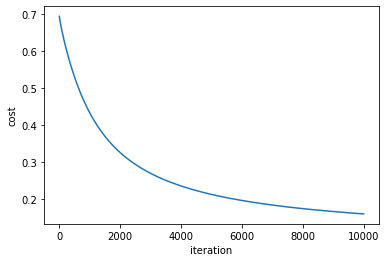

In [9]:
plt.plot(np.arange(epoch), cost_list)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()

Code dibawah adalah untuk mencari hasil "admitted" menggunakan data dari data testing seperti yang diminta di soal

In [10]:
def pred_admit(X, weight, bias):
    
    Z = np.dot(weight.T, X) + bias
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = A.astype(int)
    
    return A

x_test = testdata.T

test_admitted = pred_admit(x_test, weight, bias)
test_admitted

array([[0, 1, 1, 0, 1]])

Sesudah mendapatkan hasilnya, saya melakukan merge data agar lebih jelas dilihat

In [11]:
s1 = pd.Series(["0", "1", "1", "0", "1"], name="admitted")

result = pd.concat([test, s1], axis=1)
result

,gmat,gpa,work_experience,admitted
0,590,2.0,3,0
1,740,3.7,4,1
2,680,3.3,6,1
3,610,2.3,1,0
4,710,3.0,5,1


Function untuk menghitung akurasi dengan menggunakan sigmoid

In [12]:
def accuracy(X, Y, weight, bias):
    
    Z = np.dot(weight.T, X) + bias
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = A.astype(int)
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100  
    print(round(acc, 2))
    
    return A

Akurasi dari model ini adalah 75%

In [13]:
y_pred = accuracy(x_val, y_val, weight, bias)

75.0


Lalu seperti yang diminta dari soal juga saya mencetak confusion matrixnya

In [14]:
confusion_matrix(y_val.argmax(axis=1), y_pred.argmax(axis=1))

y_val = y_val.astype(int)
print("Prediction:",y_pred)
print("Real:",y_val)

print("\n[TP, FN]\n[FN, TN]\n")
print("[3, 1]\n[1, 3]")

Prediction: [[0 0 1 1 0 0 1 1]]
Real: [[0 1 1 0 0 0 1 1]]

[TP, FN]
[FN, TN]

[3, 1]
[1, 3]
